In [44]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

In [45]:
train = dsets.MNIST(root='', train = True, download=True, transform = transforms.ToTensor())
val = dsets.MNIST(root='', train = False, download=True, transform = transforms.ToTensor())

In [94]:
train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [47]:
train[0][1]

5

In [48]:
train[0][0].view(-1, 28**2).shape

torch.Size([1, 784])

In [79]:
epochs = 100

lr = 0.01

model = nn.Linear(28**2, 10)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = lr)

accuracy_list = []
LOSS = []

trainloader = DataLoader(dataset=train, batch_size = 100)
valloader = DataLoader(dataset=val, batch_size = 5000)

In [80]:
for epoch in range(epochs):
    
    for x, y in trainloader:
        
        optimizer.zero_grad()
        
        z = model(x.view(-1, 28**2))
        
        loss = criterion(z, y)
        
        LOSS.append(loss.item())
        
        loss.backward()
        
        optimizer.step()
        
    correct = 0
    total = 0
    
    for xt, yt in valloader:
        
        z = model(xt.view(-1, 28**2))
        
        _, yhat = torch.max(z.data, 1)
        
        correct += (yhat == yt).sum().item()
        
        total += len(yhat == yt)
        
    accuracy = correct/total * 100
    accuracy_list.append(accuracy)
        


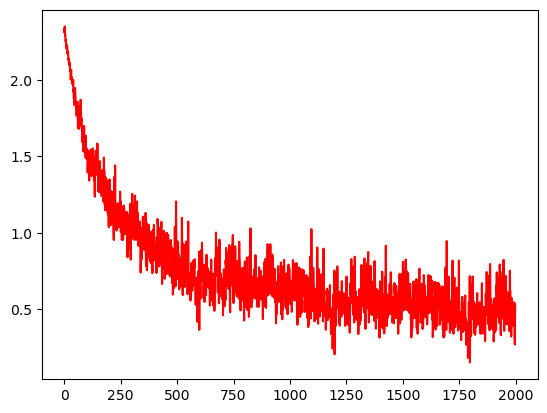

In [100]:
plt.plot(LOSS[0:2000], c='r')

In [89]:
train[0][1]

5

In [101]:
torch.max(model(train[0][0].view(-1, 28**2)), 1)[1]

tensor([5])

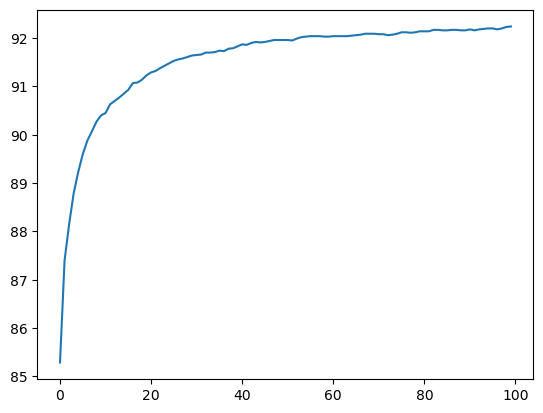

In [102]:
plt.plot(accuracy_list)